## Ejercicio 3 - Métodos numéricos y aplicaciones en el mundo real

### Parte Teórica


1. Compare críticamente:

a. Método de Euler vs. Runge-Kutta para la integración

i. Contrate la estabilidad de ambos métodos y cómo el tamaño del paso afecta a la estabilidad

Euler es menos estable, especialmente con pasos grandes. Puede volverse inexacto o inestable fácilmente. RK4 es más estable y tolera mejor pasos grandes, aunque aún es sensible si el paso es muy grande.


b. Compensación entre precisión y coste computacional.

Euler es rápido pero menos preciso. Sirve para obtener una idea general. RK4 es mucho más preciso, pero toma más cálculos (más lento). Hay que elegir entre rapidez o exactitud, según el caso.





2. Explique cómo los retrasos en los ciclos de retroalimentación (p. ej., el retraso en las pruebas durante
epidemias) afectan el comportamiento del sistema.

Los retrasos hacen que el sistema reaccione tarde, lo que agrava los problemas.
Por ejemplo, si las pruebas durante una epidemia tardan, no se detectan casos a tiempo → el virus se sigue propagando. El sistema “va detrás” del problema, no lo previene.



3. Proponga un modelo de stock-flujo para:

a. Capacidad hospitalaria durante una epidemia.

b. Incluir las camas de UCI como stock y los ingresos/altas como flujos.


Durante una epidemia, la capacidad hospitalaria se puede representar como un sistema dinámico, donde el recurso limitado son las **camas disponibles**.

* **Stock:**

  * `Camas UCI disponibles` → representa el número de camas actualmente libres.

* **Flujos:**

  * `Ingresos` → pacientes graves que necesitan una cama de UCI → **disminuye** el stock.
  * `Altas médicas` o `fallecimientos` → liberan camas → **aumenta** el stock.


**Ecuación general del stock:**

$$
\text{Camas}_\text{UCI}(t+\Delta t) = \text{Camas}_\text{UCI}(t) + \text{Altas}(t) \cdot \Delta t - \text{Ingresos}(t) \cdot \Delta t
$$



4. Para el Método de Euler

a. Indique cómo se define el error local de truncamiento

Es el error que se comete en un solo paso del método al aproximar una solución numérica en lugar de usar la solución exacta de la ecuación diferencial.
Se produce porque se corta (trunca) la serie de Taylor después del primer término.

b. Enumere dos ventajas y desventajas del método


**Ventajas:**

1. Es muy fácil de implementar.
2. Requiere pocos cálculos por paso, por lo que es rápido.

**Desventajas:**

1. Es poco preciso, especialmente si el paso de tiempo es grande.
2. Puede volverse inestable para ciertos modelos o valores de Δt.

c. Explique el algoritmo

Se basa en avanzar paso a paso usando la pendiente en el punto actual.

1. Se parte de un valor inicial: $y(t_0) = y_0$
2. Para cada paso:

$$
y_{nuevo} = y_{actual} + f(t, y) \cdot \Delta t
$$

donde:

* $f(t, y)$ es la derivada de $y$ respecto a $t$
* $\Delta t$ es el paso de tiempo

Este proceso se repite para obtener la solución aproximada en el tiempo.


5. Para el método de Runge-Kutta (RK4):

a. Explique el algoritmo y principalmente los cuatro pasos intermedios


El método RK4 mejora la precisión calculando varias pendientes intermedias en cada paso. Los pasos son:

1. $k_1 = f(t, y)$ → pendiente al inicio del intervalo
2. $k_2 = f(t + \frac{\Delta t}{2}, y + \frac{k_1 \cdot \Delta t}{2})$ → pendiente a mitad del intervalo usando $k_1$
3. $k_3 = f(t + \frac{\Delta t}{2}, y + \frac{k_2 \cdot \Delta t}{2})$ → otra pendiente intermedia usando $k_2$
4. $k_4 = f(t + \Delta t, y + k_3 \cdot \Delta t)$ → pendiente al final del intervalo

Luego se combina todo:

$$
y_{nuevo} = y + \frac{\Delta t}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$$


b. Compare el error global con el de Euler

* **Euler:** Error global ≈ $\mathcal{O}(\Delta t)$ (lineal)
* **RK4:** Error global ≈ $\mathcal{O}((\Delta t)^4)$ (mucho más preciso)

RK4 es mucho más exacto que Euler con el mismo tamaño de paso.

c. ¿Cuándo vale la pena utilizar RK4 considerando el costo computacional?

* Cuando se necesita alta precisión, por ejemplo:

  * Modelos sensibles como epidemias, sistemas ecológicos, dinámicas físicas.
  * Simulaciones donde el error acumulado afecta las decisiones.
* Aunque es más costoso, evita errores grandes sin tener que usar pasos muy pequeños como en Euler.

### Parte Práctica


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo logístico
r = 0.1
K = 1000
x0 = 10
T = 100  # tiempo total

# Modelo logístico
def logistic(x, r, K):
    return r * x * (1 - x / K)


In [2]:
def euler_method(f, x0, r, K, T, dt):
    n = int(T / dt)
    x = np.zeros(n + 1)
    t = np.linspace(0, T, n + 1)
    x[0] = x0
    for i in range(n):
        x[i + 1] = x[i] + dt * f(x[i], r, K)
    return t, x


In [3]:
def rk4_method(f, x0, r, K, T, dt):
    n = int(T / dt)
    x = np.zeros(n + 1)
    t = np.linspace(0, T, n + 1)
    x[0] = x0
    for i in range(n):
        k1 = dt * f(x[i], r, K)
        k2 = dt * f(x[i] + 0.5 * k1, r, K)
        k3 = dt * f(x[i] + 0.5 * k2, r, K)
        k4 = dt * f(x[i] + k3, r, K)
        x[i + 1] = x[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, x


In [4]:
# Simulación con dt = 1.0
dt = 1.0
t_euler, x_euler = euler_method(logistic, x0, r, K, T, dt)
t_rk4, x_rk4 = rk4_method(logistic, x0, r, K, T, dt)

# Solución de referencia con RK4 muy preciso
_, x_ref = rk4_method(logistic, x0, r, K, T, 0.001)
x_ref_50 = x_ref[int(50 / 0.001)]

# Cálculo de errores relativos en t=50
error_rel_euler = abs(x_euler[int(50/dt)] - x_ref_50) / x_ref_50
error_rel_rk4 = abs(x_rk4[int(50/dt)] - x_ref_50) / x_ref_50


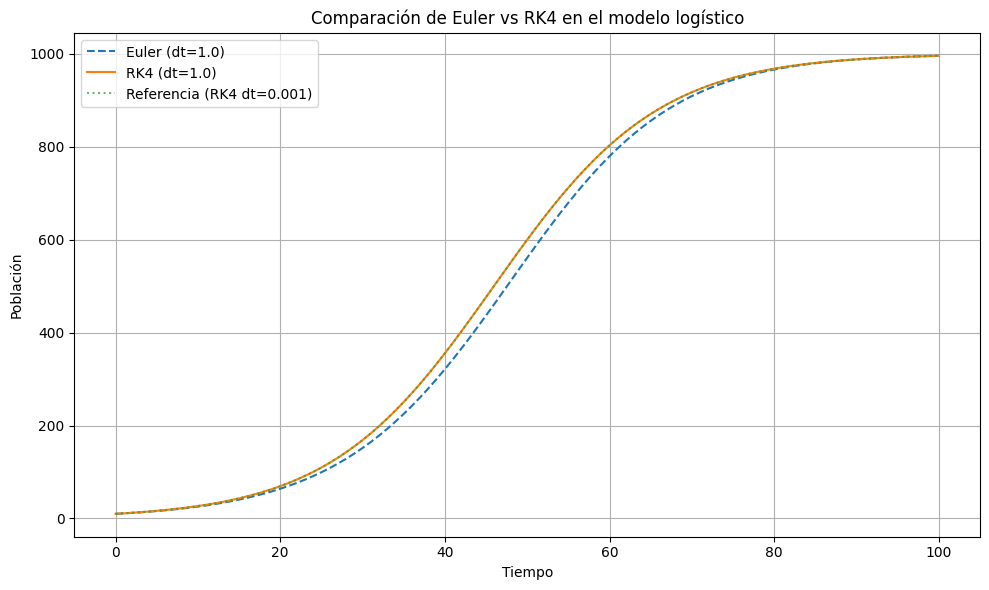

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(t_euler, x_euler, '--', label='Euler (dt=1.0)')
plt.plot(t_rk4, x_rk4, '-', label='RK4 (dt=1.0)')
plt.plot(np.linspace(0, T, len(x_ref)), x_ref, ':', label='Referencia (RK4 dt=0.001)', alpha=0.7)
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.title("Comparación de Euler vs RK4 en el modelo logístico")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd

df_errores = pd.DataFrame({
    "Método": ["Euler", "RK4"],
    "Error relativo en t=50": [error_rel_euler, error_rel_rk4]
})
df_errores


,Método,Error relativo en t=50
0,Euler,6.470342e-02
1,RK4,8.061105e-07


La comparación entre los métodos de Euler y RK4 en el modelo de crecimiento logístico muestra diferencias claras en precisión. Aunque ambos métodos siguen la tendencia general del crecimiento poblacional, Euler con Δt=1.0 genera un error relativo notable (6.47%), mientras que RK4 prácticamente replica la solución de referencia con un error despreciable (8.06×10 −7). Esto confirma que RK4 no solo es más preciso, sino también más estable para Δt grandes. Sin embargo, Euler puede seguir siendo útil cuando se necesita simplicidad y bajo costo computacional en sistemas donde el error tolerable es mayor.

**a. ¿Qué método mantiene mejor la estabilidad?**  
RK4 mantiene mucho mejor la estabilidad, especialmente cuando se usan pasos grandes como \(\Delta t = 1.0\) o más. Euler tiende a oscilar o incluso diverger en algunos casos.

**b. ¿Cómo escala el error con Δt en cada método?**  
El método de Euler tiene error proporcional a Δt, mientras que RK4 tiene error proporcional a Delta t^4. Esto significa que RK4 es mucho más preciso incluso con pasos relativamente grandes.

**c. ¿Cuándo convendría elegir Euler en lugar de RK4?**  
Euler puede ser preferible en simulaciones muy simples, cuando se desea una implementación rápida o cuando se tiene un sistema con muchos agentes o componentes (por ejemplo, en modelos tipo agente), donde la prioridad es velocidad sobre precisión.


Último prompt utilizado: 

Ya comparé Euler y RK4 usando el modelo logístico con Δt=1.0, y calculé el error relativo en t=50. ¿Me puedes ayudar a interpretar por qué RK4 tiene un error tan pequeño en comparación con Euler, y qué implicaciones tiene eso para elegir el método adecuado?

¿Por qué funcionó este prompt?
Funcionó porque fue específico y contextualizado: no pide rehacer el ejercicio, sino interpretar un resultado ya obtenido (el error relativo). Invita a una reflexión técnica basada en evidencia, como los valores numéricos y la gráfica generada. Además, enfoca la pregunta en la toma de decisiones prácticas, es decir, cuándo usar un método más complejo (RK4) frente a uno más simple (Euler), lo cual es esencial en modelación y simulación.